In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In [2]:
def image_data(table,center_x,center_y):
    x = np.array(table['X'])
    y = np.array(table['Y'])
    data=np.zeros([4096,4096])
    for i in range(len(x)):
        data[x[i]][y[i]] = data[x[i]][y[i]]+1
    new_data = np.zeros([4096,4096])
    shift_x = 2075.0-center_x
    shift_y = 2714.0-center_y
    for j in range(4096):
        if (j+shift_x) >= 0 and (j+shift_x) < 4096:
            for k in range(4096):
                if (k+shift_y) >= 0 and (k+shift_y) < 4096:
                    new_data[int(j+shift_x)][int(k+shift_y)]=data[j][k]
                else:pass
        else:pass
    return new_data

obs_info = Table.read('tde/obs_info.csv').to_pandas()
Cen_X = obs_info['X']
Cen_Y = obs_info['Y']
Obs_ID = obs_info['Observation ID']
Cmos_num = obs_info['CMOS Num']
new_data = np.zeros([4096,4096])

for i in range(len(Cen_X)):
    print(i)
    public_path = r'tde/'
    file_name = str(Obs_ID[i])+'_'+str(Cmos_num[i])+'.fits'
    file_path = public_path+file_name
    table = Table.read(file_path).to_pandas()
    center_x = Cen_X[i]
    center_y = Cen_Y[i]
    data = image_data(table,center_x,center_y)
    new_data = new_data+data

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189


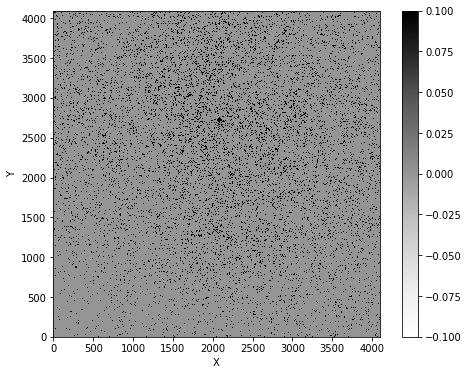

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X')
ax.set_ylabel('Y')
im=ax.imshow(new_data.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax)
im.set_clim(np.percentile(data.flatten(),20),np.percentile(data.flatten(),98))
#im.set_clim(0,2)
plt.show()

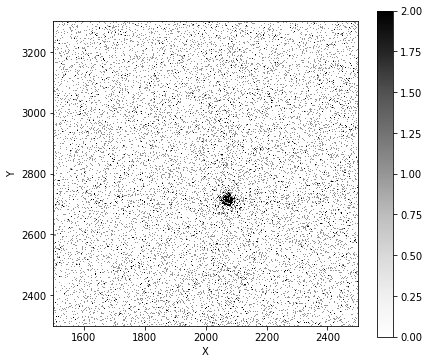

In [19]:
fig = plt.figure(figsize=[15,6])
ax1 = fig.add_subplot(121)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(1500, 2500)
ax1.set_ylim(2300, 3300)
im=ax1.imshow(new_data.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax1)
#im.set_clim(np.percentile(data.flatten(),20),np.percentile(data.flatten(),98))
im.set_clim(0,2)

'''
source_point = [2075, 2714]   # 源中心点坐标
x0, y0 = source_point[0], source_point[1]
r0 = 20   # 源半径
circle = plt.Circle((x0, y0), r0, color='r', linewidth=1, fill=False)
plt.gcf().gca().add_artist(circle)
'''

'''
ax2 = fig.add_subplot(122)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim(1500, 2500)
ax2.set_ylim(2300, 3300)
im = ax2.imshow(new_data.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax2)
#im.set_clim(0,np.percentile(counts.flatten(),98))
im.set_clim(0,2)

back_point = [1875,2514]   # 背景区域中心点
xb, yb = back_point[0], back_point[1]
rb = 20   # 背景区域半径
circle = plt.Circle((xb, yb), rb, color='r', linewidth=1, fill=False)
plt.gcf().gca().add_artist(circle)
'''
plt.show()